# Investigate an SFUSD Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#quality">Data Quality Assessment</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Data Sources

* SFUSD Lottery parents group csv file, which compiles data from these sheets: http://www.sfusd.edu/en/enroll-in-sfusd-schools/monitoring-student-assignment/student-assignment-system.html?fbclid=IwAR1z3WYAGrmuigkqhIS45E3ScqsnZ5cLMqEoXw9NO8cVNpaWS2XQ8xoyBHw

In [1]:
# Importing packages and functions
import pandas as pd
import numpy as np
import datetime # operations to parse dates
import time
import csv
from pprint import pprint #for pretty printing dictionaries
#import ggplot as gplot
import matplotlib as mpl # Still required to change the sizes of plots
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
% matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('./data/SFUSD_parents_09_2018.csv')
df2 = df.copy()

## Data Quality Assessment

In [3]:
df.head()

,SCHOOL Name,Wait Pool Jul 2018,Wait Pool June 2018,Total Requests Round 1 (2018),1st choice Requests Round 1 (2018),Wait Pool June 2017,Total Requests Round 1 (2017),1st choice Requests Round 1 2017,# of K Seats,# of TK Seats ***,...,Type,Middle Feeder,Grades,Neighborhood,Address,Phone,HOURS,Uniform,WEBSITE,Before School or After School Program
0,"Alamo Elementary School, GE",8,9,1226,84,11,1096.0,89.0,88,0,...,attendance,Presidio,K-5,Outer Richmond,250 23rd Avenue,(415) 750-8456,8:40 a.m. - 2:40 p.m.,no,http://www.friendsofalamo.org/,Monday - Friday: RDASC (Richmond District Afte...
1,Alvarado Elementary School (Spanish Immersion),"SE 12, SN 2","SE 10, SN 1","SE 652, SN 116","SE 68, SN 47","SE 14, SN 8",758.0,115.0,44,0,...,citywide,Lick,K-5,Noe Valley,625 Douglass Street,(415) 695-5695,7:50 a.m.–1:50 p.m.,no,NaN,Mission Graduates
2,"Alvarado Elementary School, GE",9,7,995,59,8,972.0,44.0,44,18,...,attendance,Lick,K-5,Noe Valley,625 Douglass Street,(415) 695-5695,7:50 a.m.–1:50 p.m.,no,NaN,Mission Graduates
3,"Argonne Elementary School, GE",8,10,1275,97,6,1104.0,83.0,"66 2017-18, 88 2016-17 (alternates yearly)",18,...,attendance,Presidio,K-5,Inner Richmond,680 18th Avenue,(415) 750-8460,8:40 am - 2:40 pm,no,NaN,"2:40-6:00 Richmond YMCA, Richmond District Aft..."
4,"Bryant Elementary School, GE",0,0,219,3,0,149.0,5.0,22,0,...,attendance,Everett,K-5,Mission,2641 25th Street,(415) 695-5780,7:50am-2:05pm; Thu 12:50pm,"White shirt, navy blue sweater, blue pants or ...",NaN,SFUSD Early Education Department Out of School...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 22 columns):
SCHOOL Name                              133 non-null object
Wait Pool Jul 2018                       116 non-null object
Wait Pool June 2018                      111 non-null object
Total Requests Round 1 (2018)            116 non-null object
1st choice Requests Round 1 (2018)       116 non-null object
Wait Pool June 2017                      110 non-null object
Total Requests Round 1 (2017)            110 non-null float64
1st choice Requests Round 1 2017         110 non-null float64
# of K Seats                             117 non-null object
# of TK Seats ***                        116 non-null object
August 2016 Wait Pool #                  117 non-null object
# Enrolled 2016                          110 non-null float64
Type                                     114 non-null object
Middle Feeder                            105 non-null object
Grades                                

In [5]:
df.tail()

,SCHOOL Name,Wait Pool Jul 2018,Wait Pool June 2018,Total Requests Round 1 (2018),1st choice Requests Round 1 (2018),Wait Pool June 2017,Total Requests Round 1 (2017),1st choice Requests Round 1 2017,# of K Seats,# of TK Seats ***,...,Type,Middle Feeder,Grades,Neighborhood,Address,Phone,HOURS,Uniform,WEBSITE,Before School or After School Program
129,(NS) Spanish Newcomer Pathway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,(NX) Mixed Language Newcomer Pathway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,(SB) Spanish Biliteracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,(SE) Spanish Immersion Non-Target Language,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,(SN) Spanish Immersion Target Language,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.sample()

,SCHOOL Name,Wait Pool Jul 2018,Wait Pool June 2018,Total Requests Round 1 (2018),1st choice Requests Round 1 (2018),Wait Pool June 2017,Total Requests Round 1 (2017),1st choice Requests Round 1 2017,# of K Seats,# of TK Seats ***,...,Type,Middle Feeder,Grades,Neighborhood,Address,Phone,HOURS,Uniform,WEBSITE,Before School or After School Program
2,"Alvarado Elementary School, GE",9,7,995,59,8,972.0,44.0,44,18,...,attendance,Lick,K-5,Noe Valley,625 Douglass Street,(415) 695-5695,7:50 a.m.–1:50 p.m.,no,NaN,Mission Graduates


### Quality Issues to review 

- column names: lowercase, spaces, descriptive
- column order
- NaN, null, outlier entries
- data types
- utility of masks, bins
- consider dropping schools with null request, waitlist data

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [7]:
print("Rows:  ", df.shape[0])
print("Columns: ", df.shape[1])

Rows:   134
Columns:  22


In [8]:
df.describe()

,Total Requests Round 1 (2017),1st choice Requests Round 1 2017,# Enrolled 2016
count,110.000000,110.000000,110.000000
mean,441.927273,41.245455,393.600000
std,424.464276,41.554913,151.803724
min,1.000000,0.000000,47.000000
25%,114.500000,12.000000,266.000000
50%,268.000000,24.000000,361.500000
75%,708.000000,51.000000,517.000000
max,1610.000000,195.000000,700.000000


### Rename columns and replace characters

In [9]:
df.rename(columns={'Wait Pool Jul 2018' : 'Waitpool_7_18',
                  'Wait Pool June 2018': 'Waitpool_6_18',
                  'Total Requests Round 1 (2018)':'Total_requests_Rnd1_18',
                  '1st choice Requests Round 1 (2018)':'1st_request_Rnd1_18',
                  'Wait Pool June 2017':'Waitpool_6_17',
                   'Total Requests Round _2017)':'total_requests_Rnd1_17',
                   'Total Requests Round 1 (2017)':'Total_requests_Rnd1_17',
                   '1st choice Requests Round 1 2017':'1st_request_Rnd1_17',
                   'August 2016 Wait Pool #' :'Waitpool_8_16',
                   'Before School or After School Program': 'Before_After School Program',
                  }, inplace=True)

In [10]:
df.columns = [x.lower() for x in df.columns]

In [11]:
df.columns = [x.strip().replace('#', 'number') for x in df.columns]

In [12]:
df.columns = [x.strip().replace(' ', '_') for x in df.columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 22 columns):
school_name                    133 non-null object
waitpool_7_18                  116 non-null object
waitpool_6_18                  111 non-null object
total_requests_rnd1_18         116 non-null object
1st_request_rnd1_18            116 non-null object
waitpool_6_17                  110 non-null object
total_requests_rnd1_17         110 non-null float64
1st_request_rnd1_17            110 non-null float64
number_of_k_seats              117 non-null object
number_of_tk_seats_***         116 non-null object
waitpool_8_16                  117 non-null object
number_enrolled_2016           110 non-null float64
type                           114 non-null object
middle_feeder                  105 non-null object
grades                         120 non-null object
neighborhood                   120 non-null object
address                        120 non-null object
phone                    

### Reorder data columns

In [14]:
df.reindex(sorted(df.columns), axis=1)
#https://stackoverflow.com/questions/11067027/python-pandas-re-ordering-columns-in-a-dataframe-based-on-column-name

,1st_request_rnd1_17,1st_request_rnd1_18,address,before_after_school_program,grades,hours,middle_feeder,neighborhood,number_enrolled_2016,number_of_k_seats,...,school_name,total_requests_rnd1_17,total_requests_rnd1_18,type,uniform,waitpool_6_17,waitpool_6_18,waitpool_7_18,waitpool_8_16,website
0,89.0,84,250 23rd Avenue,Monday - Friday: RDASC (Richmond District Afte...,K-5,8:40 a.m. - 2:40 p.m.,Presidio,Outer Richmond,530.0,88,...,"Alamo Elementary School, GE",1096.0,1226,attendance,no,11,9,8,1,http://www.friendsofalamo.org/
1,115.0,"SE 68, SN 47",625 Douglass Street,Mission Graduates,K-5,7:50 a.m.–1:50 p.m.,Lick,Noe Valley,535.0,44,...,Alvarado Elementary School (Spanish Immersion),758.0,"SE 652, SN 116",citywide,no,"SE 14, SN 8","SE 10, SN 1","SE 12, SN 2","SE 18, SN 8",NaN
2,44.0,59,625 Douglass Street,Mission Graduates,K-5,7:50 a.m.–1:50 p.m.,Lick,Noe Valley,535.0,44,...,"Alvarado Elementary School, GE",972.0,995,attendance,no,8,7,9,"17 K, 17 TK",NaN
3,83.0,97,680 18th Avenue,"2:40-6:00 Richmond YMCA, Richmond District Aft...",K-5,8:40 am - 2:40 pm,Presidio,Inner Richmond,422.0,"66 2017-18, 88 2016-17 (alternates yearly)",...,"Argonne Elementary School, GE",1104.0,1275,attendance,no,6,10,8,"7 K, 18 TK",NaN
4,5.0,3,2641 25th Street,SFUSD Early Education Department Out of School...,K-5,7:50am-2:05pm; Thu 12:50pm,Everett,Mission,216.0,22,...,"Bryant Elementary School, GE",149.0,219,attendance,"White shirt, navy blue sweater, blue pants or ...",0,0,0,0,NaN
5,17.0,27,2641 25th Street,SFUSD Early Education Department Out of School...,K-5,7:50am-2:05pm; Thu 12:50pm,Everett,Mission,216.0,22,...,"Bryant Elementary School, SPN (Eng Lang Learner)",56.0,80,citywide,"White shirt, navy blue sweater, blue pants or ...",2,2,3,4,NaN
6,99.0,"SE 34, SN 32",3351 23rd Street,BVCC runs a before-school program from 7:00 to...,K-8,"9:30am-3:45pm, Thu 2:30pm",NaN,Mission,600.0,66,...,"Buena Vista Horace Mann, SPN Immersion",575.0,"SE 479, SN 146",citywide,no,"SE 5, SN 4","SE 11, SN 2","SE 14, SN 4","SE 8, SN 5",NaN
7,8.0,8,375 7th Street,"(ExCEL Program), operated on-site by YMCA Emba...",K-8,8:40 a.m. - 2:40 p.m.,NaN,South of Market,653.0,88 combo,...,"Carmichael, Bessie (K-5 Campus), FIL (Eng Lang...",34.0,39,citywide,no,0,0,0,"2 K, 2 TK",NaN
8,39.0,49,375 7th Street,"(ExCEL Program), operated on-site by YMCA Emba...",K-8,8:40 a.m. - 2:40 p.m.,NaN,South of Market,653.0,88 combo,...,"Carmichael, Bessie (K-5 Campus), GE",199.0,293,citywide,no,2,1,6,"2 K, 2 TK",NaN
9,6.0,15,1360 Oakdale Avenue,ExCEL after-school program sponsored by the Ba...,K-5,8:30 a.m. - 2:40 p.m.,"Aptos, Brown",Bayview,282.0,44,...,"Carver, Dr. George Washington Elementary Schoo...",102.0,182,attendance,"Boys: navy blue pants, white shirt, Mayfair sw...",0,0,0,0,NaN


In [15]:
df.sort_index(axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 22 columns):
1st_request_rnd1_17            110 non-null float64
1st_request_rnd1_18            116 non-null object
address                        120 non-null object
before_after_school_program    119 non-null object
grades                         120 non-null object
hours                          119 non-null object
middle_feeder                  105 non-null object
neighborhood                   120 non-null object
number_enrolled_2016           110 non-null float64
number_of_k_seats              117 non-null object
number_of_tk_seats_***         116 non-null object
phone                          120 non-null object
school_name                    133 non-null object
total_requests_rnd1_17         110 non-null float64
total_requests_rnd1_18         116 non-null object
type                           114 non-null object
uniform                        113 non-null object
waitpool_6_17            

In [16]:
cols = list(df.columns.values)
print(cols)

['1st_request_rnd1_17', '1st_request_rnd1_18', 'address', 'before_after_school_program', 'grades', 'hours', 'middle_feeder', 'neighborhood', 'number_enrolled_2016', 'number_of_k_seats', 'number_of_tk_seats_***', 'phone', 'school_name', 'total_requests_rnd1_17', 'total_requests_rnd1_18', 'type', 'uniform', 'waitpool_6_17', 'waitpool_6_18', 'waitpool_7_18', 'waitpool_8_16', 'website']


In [17]:
df = df[['school_name','type','grades', 'hours','address','number_of_k_seats','number_of_tk_seats_***','number_enrolled_2016','before_after_school_program', 'neighborhood','1st_request_rnd1_17', '1st_request_rnd1_18', 'total_requests_rnd1_17', 'total_requests_rnd1_18', 'waitpool_6_17', 'waitpool_6_18', 'waitpool_7_18', 'waitpool_8_16', 'website','phone','middle_feeder','uniform']]
#https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns

### Convert data types

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 22 columns):
school_name                    133 non-null object
type                           114 non-null object
grades                         120 non-null object
hours                          119 non-null object
address                        120 non-null object
number_of_k_seats              117 non-null object
number_of_tk_seats_***         116 non-null object
number_enrolled_2016           110 non-null float64
before_after_school_program    119 non-null object
neighborhood                   120 non-null object
1st_request_rnd1_17            110 non-null float64
1st_request_rnd1_18            116 non-null object
total_requests_rnd1_17         110 non-null float64
total_requests_rnd1_18         116 non-null object
waitpool_6_17                  110 non-null object
waitpool_6_18                  111 non-null object
waitpool_7_18                  116 non-null object
waitpool_8_16            

In [19]:
df = df.convert_objects(convert_numeric=True)
df.dtypes
#https://stackoverflow.com/questions/28277137/how-to-convert-datatypeobject-to-float64-in-python
#https://stackoverflow.com/questions/15891038/change-data-type-of-columns-in-pandas/28648923

/Users/Irene/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


school_name                     object
type                            object
grades                          object
hours                           object
address                         object
number_of_k_seats              float64
number_of_tk_seats_***         float64
number_enrolled_2016           float64
before_after_school_program     object
neighborhood                    object
1st_request_rnd1_17            float64
1st_request_rnd1_18            float64
total_requests_rnd1_17         float64
total_requests_rnd1_18         float64
waitpool_6_17                  float64
waitpool_6_18                  float64
waitpool_7_18                  float64
waitpool_8_16                  float64
website                         object
phone                           object
middle_feeder                   object
uniform                         object
dtype: object

In [20]:
df.type = df.type.astype('category')
df.grades = df.grades.astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 22 columns):
school_name                    133 non-null object
type                           114 non-null category
grades                         120 non-null category
hours                          119 non-null object
address                        120 non-null object
number_of_k_seats              85 non-null float64
number_of_tk_seats_***         114 non-null float64
number_enrolled_2016           110 non-null float64
before_after_school_program    119 non-null object
neighborhood                   120 non-null object
1st_request_rnd1_17            110 non-null float64
1st_request_rnd1_18            98 non-null float64
total_requests_rnd1_17         110 non-null float64
total_requests_rnd1_18         98 non-null float64
waitpool_6_17                  94 non-null float64
waitpool_6_18                  94 non-null float64
waitpool_7_18                  98 non-null float64
waitpool_8_16       

In [22]:
for  feature  in  ['type','grades']:
    print("{}: {}".format(feature, df[feature].unique()))

type: [attendance, citywide, charter, NaN]
Categories (3, object): [attendance, citywide, charter]
grades: [K-5, K-8, PreK-5, preK-TK, TK-5, K-3 (goal to be a K-12), PreK-8, prek-5, TK-8, NaN]
Categories (9, object): [K-5, K-8, PreK-5, preK-TK, ..., K-3 (goal to be a K-12), PreK-8, prek-5, TK-8]


### Select the data that I will be using

In [23]:
#seperate out the columns I don't need, and keep the school_name in that df
#https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
#also, create a new table with columns I don't need in this table: https://www.youtube.com/watch?time_continue=85&v=LhdGQC_vjEs
object_info_df = df.iloc[:, [0,3,4,9,18,19,20,21]]
object_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
school_name      133 non-null object
hours            119 non-null object
address          120 non-null object
neighborhood     120 non-null object
website          31 non-null object
phone            120 non-null object
middle_feeder    105 non-null object
uniform          113 non-null object
dtypes: object(8)
memory usage: 8.5+ KB


In [24]:
#seperate out the data columns that I will be working with 
#https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/
data = df.iloc[:, [0,1,2,5,7,8,10,11,12,13,14,15,16,17]]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 14 columns):
school_name                    133 non-null object
type                           114 non-null category
grades                         120 non-null category
number_of_k_seats              85 non-null float64
number_enrolled_2016           110 non-null float64
before_after_school_program    119 non-null object
1st_request_rnd1_17            110 non-null float64
1st_request_rnd1_18            98 non-null float64
total_requests_rnd1_17         110 non-null float64
total_requests_rnd1_18         98 non-null float64
waitpool_6_17                  94 non-null float64
waitpool_6_18                  94 non-null float64
waitpool_7_18                  98 non-null float64
waitpool_8_16                  86 non-null float64
dtypes: category(2), float64(10), object(2)
memory usage: 13.4+ KB


### Check data entries: Duplicate, Null, Unique

In [25]:
data.duplicated().sum()

0

In [26]:
data.nunique().sum()

701

In [27]:
data.isnull().any()

school_name                    True
type                           True
grades                         True
number_of_k_seats              True
number_enrolled_2016           True
before_after_school_program    True
1st_request_rnd1_17            True
1st_request_rnd1_18            True
total_requests_rnd1_17         True
total_requests_rnd1_18         True
waitpool_6_17                  True
waitpool_6_18                  True
waitpool_7_18                  True
waitpool_8_16                  True
dtype: bool

### Manage  NaN entries

In [28]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

school_name                     1
type                           20
grades                         14
number_of_k_seats              49
number_enrolled_2016           24
before_after_school_program    15
1st_request_rnd1_17            24
1st_request_rnd1_18            36
total_requests_rnd1_17         24
total_requests_rnd1_18         36
waitpool_6_17                  40
waitpool_6_18                  40
waitpool_7_18                  36
waitpool_8_16                  48
dtype: int64

In [29]:
print(data[data.isnull().any(axis=1)][null_columns].head())

                                         school_name        type grades  \
1     Alvarado Elementary School (Spanish Immersion)    citywide    K-5   
2                     Alvarado Elementary School, GE  attendance    K-5   
3                      Argonne Elementary School, GE  attendance    K-5   
6             Buena Vista Horace Mann, SPN Immersion    citywide    K-8   
7  Carmichael, Bessie (K-5 Campus), FIL (Eng Lang...    citywide    K-8   

   number_of_k_seats  number_enrolled_2016  \
1               44.0                 535.0   
2               44.0                 535.0   
3                NaN                 422.0   
6               66.0                 600.0   
7                NaN                 653.0   

                         before_after_school_program  1st_request_rnd1_17  \
1                                  Mission Graduates                115.0   
2                                  Mission Graduates                 44.0   
3  2:40-6:00 Richmond YMCA, Richmond Dist

In [30]:
print(data[data["1st_request_rnd1_17"].isnull()][null_columns])

                                           school_name     type  \
20                        Creative Arts Charter School  charter   
55                McLaren, John Early Education School      NaN   
59                          Mission Preparatory School  charter   
69                                          New School  charter   
71                      Noriega Early Education School      NaN   
79                     Presidio Early Education School      NaN   
83         Rodriguez, Zaida T.  Early Education School      NaN   
99          Stockton, Commodore Early Education School      NaN   
108  Thomas Edison Charter Academy (TECA) - 2/3 Spa...  charter   
109               Tule Elk Park Early Education School      NaN   
120                                                NaN      NaN   
121                            (CB) Chinese Biliteracy      NaN   
122         (CE) Chinese Immersion Non-Target Language      NaN   
123             (CN) Chinese Immersion Target Language      Na

In [31]:
#http://www.residentmar.io/2016/06/12/null-and-missing-data-python.html
#https://stackoverflow.com/questions/40408471/select-data-when-specific-columns-have-null-value-in-pandas
data[data.filter(like='waitpool').isnull().all(1)]

,school_name,type,grades,number_of_k_seats,number_enrolled_2016,before_after_school_program,1st_request_rnd1_17,1st_request_rnd1_18,total_requests_rnd1_17,total_requests_rnd1_18,waitpool_6_17,waitpool_6_18,waitpool_7_18,waitpool_8_16
1,Alvarado Elementary School (Spanish Immersion),citywide,K-5,44.0,535.0,Mission Graduates,115.0,NaN,758.0,NaN,NaN,NaN,NaN,NaN
6,"Buena Vista Horace Mann, SPN Immersion",citywide,K-8,66.0,600.0,BVCC runs a before-school program from 7:00 to...,99.0,NaN,575.0,NaN,NaN,NaN,NaN,NaN
14,"Chinese Immersion School at DeAvila (CIS), Can...",citywide,K-5,66.0,405.0,"7-8:40am, 2:40-6pm YMCA Buchanan (waitlist)",65.0,NaN,634.0,NaN,NaN,NaN,NaN,NaN
20,Creative Arts Charter School,charter,K-8,44.0,440.0,Campus yard open at 8am; aftercare program ons...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,"Flynn, Leonard Elementary School, Spanish Imme...",citywide,K-5,NaN,NaN,"Mission YMCA, 7:30 AM to 6:30 PM\nExCEL progra...",32.0,NaN,274.0,NaN,NaN,NaN,NaN,NaN
37,"Huerta, Dolores Elementary School/ formerly Fa...",citywide,PreK-5,66.0,387.0,Before-School YMCA - Fee base 7:00 - 8:15\nYMC...,51.0,NaN,570.0,NaN,NaN,NaN,NaN,NaN
47,"Lilienthal, Claire (K-2 Madison Campus), Korea...",citywide,K-8,22.0,674.0,Presidio YMCA for onsite aftercare. Presidio E...,39.0,NaN,378.0,NaN,NaN,NaN,NaN,NaN
52,"Marshall Elementary School, Spanish Immersion",citywide,K-5,44.0,240.0,"Mission Graduates, sliding scale for students ...",59.0,NaN,386.0,NaN,NaN,NaN,NaN,NaN
59,Mission Preparatory School,charter,TK-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,"Monroe Elementary School, Spanish Immersion",citywide,K-5,NaN,552.0,After-school programs run from 2:25 to 6:00 p....,55.0,NaN,344.0,NaN,NaN,NaN,NaN,NaN


In [32]:
#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html
#data[data.notnull()]
data[data.filter(like='waitpool').notnull().all(1)]

,school_name,type,grades,number_of_k_seats,number_enrolled_2016,before_after_school_program,1st_request_rnd1_17,1st_request_rnd1_18,total_requests_rnd1_17,total_requests_rnd1_18,waitpool_6_17,waitpool_6_18,waitpool_7_18,waitpool_8_16
0,"Alamo Elementary School, GE",attendance,K-5,88.0,530.0,Monday - Friday: RDASC (Richmond District Afte...,89.0,84.0,1096.0,1226.0,11.0,9.0,8.0,1.0
4,"Bryant Elementary School, GE",attendance,K-5,22.0,216.0,SFUSD Early Education Department Out of School...,5.0,3.0,149.0,219.0,0.0,0.0,0.0,0.0
5,"Bryant Elementary School, SPN (Eng Lang Learner)",citywide,K-5,22.0,216.0,SFUSD Early Education Department Out of School...,17.0,27.0,56.0,80.0,2.0,2.0,3.0,4.0
9,"Carver, Dr. George Washington Elementary Schoo...",attendance,K-5,44.0,282.0,ExCEL after-school program sponsored by the Ba...,6.0,15.0,102.0,182.0,0.0,0.0,0.0,0.0
10,"Chávez, César Elementary School, GE",attendance,PreK-5,NaN,494.0,supervised recess from 8:00 - 8:35 - Playworks...,11.0,11.0,149.0,244.0,2.0,0.0,0.0,0.0
11,"Chávez, César Elementary School, SPN (Eng Lang...",citywide,PreK-5,NaN,494.0,supervised recess from 8:00 - 8:35 - Playworks...,18.0,17.0,66.0,89.0,1.0,0.0,0.0,4.0
12,"Chin, John Yehall Elementary School, CHN (Eng ...",citywide,K-5,22.0,264.0,3:35 to 5:30 PM: fee based. Run by the Chinato...,49.0,40.0,135.0,128.0,3.0,3.0,4.0,4.0
13,"Chin, John Yehall Elementary School, GE",attendance,K-5,22.0,264.0,3:35 to 5:30 PM: fee based. Run by the Chinato...,20.0,15.0,514.0,520.0,2.0,3.0,3.0,2.0
15,Clarendon Elementary School (GE),attendance,K-5,44.0,272.0,Before care starts at 7am and after care until...,144.0,122.0,1610.0,1630.0,19.0,13.0,12.0,21.0
17,"Cleveland Elementary School, GE",attendance,K-5,NaN,308.0,ExCEL program offered at sliding scale to fami...,7.0,12.0,133.0,210.0,2.0,0.0,3.0,3.0


In [33]:
#http://www.residentmar.io/2016/06/12/null-and-missing-data-python.html
#https://stackoverflow.com/questions/40408471/select-data-when-specific-columns-have-null-value-in-pandas
data[data.filter(like='request').isnull().all(1)]

,school_name,type,grades,number_of_k_seats,number_enrolled_2016,before_after_school_program,1st_request_rnd1_17,1st_request_rnd1_18,total_requests_rnd1_17,total_requests_rnd1_18,waitpool_6_17,waitpool_6_18,waitpool_7_18,waitpool_8_16
20,Creative Arts Charter School,charter,K-8,44.0,440.0,Campus yard open at 8am; aftercare program ons...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Mission Preparatory School,charter,TK-5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,New School,charter,K-3 (goal to be a K-12),48.0,NaN,Onsite before school care beginning at 7:45am ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Thomas Edison Charter Academy (TECA) - 2/3 Spa...,charter,TK-8,66.0,700.0,Mission Graduates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,(CB) Chinese Biliteracy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
122,(CE) Chinese Immersion Non-Target Language,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,(CN) Chinese Immersion Target Language,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,(GE) General Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,(JB) Japanese Bi-Cultural Program,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
data[data.filter(like='request').notnull().all(1)]

,school_name,type,grades,number_of_k_seats,number_enrolled_2016,before_after_school_program,1st_request_rnd1_17,1st_request_rnd1_18,total_requests_rnd1_17,total_requests_rnd1_18,waitpool_6_17,waitpool_6_18,waitpool_7_18,waitpool_8_16
0,"Alamo Elementary School, GE",attendance,K-5,88.0,530.0,Monday - Friday: RDASC (Richmond District Afte...,89.0,84.0,1096.0,1226.0,11.0,9.0,8.0,1.0
2,"Alvarado Elementary School, GE",attendance,K-5,44.0,535.0,Mission Graduates,44.0,59.0,972.0,995.0,8.0,7.0,9.0,NaN
3,"Argonne Elementary School, GE",attendance,K-5,NaN,422.0,"2:40-6:00 Richmond YMCA, Richmond District Aft...",83.0,97.0,1104.0,1275.0,6.0,10.0,8.0,NaN
4,"Bryant Elementary School, GE",attendance,K-5,22.0,216.0,SFUSD Early Education Department Out of School...,5.0,3.0,149.0,219.0,0.0,0.0,0.0,0.0
5,"Bryant Elementary School, SPN (Eng Lang Learner)",citywide,K-5,22.0,216.0,SFUSD Early Education Department Out of School...,17.0,27.0,56.0,80.0,2.0,2.0,3.0,4.0
7,"Carmichael, Bessie (K-5 Campus), FIL (Eng Lang...",citywide,K-8,NaN,653.0,"(ExCEL Program), operated on-site by YMCA Emba...",8.0,8.0,34.0,39.0,0.0,0.0,0.0,NaN
8,"Carmichael, Bessie (K-5 Campus), GE",citywide,K-8,NaN,653.0,"(ExCEL Program), operated on-site by YMCA Emba...",39.0,49.0,199.0,293.0,2.0,1.0,6.0,NaN
9,"Carver, Dr. George Washington Elementary Schoo...",attendance,K-5,44.0,282.0,ExCEL after-school program sponsored by the Ba...,6.0,15.0,102.0,182.0,0.0,0.0,0.0,0.0
10,"Chávez, César Elementary School, GE",attendance,PreK-5,NaN,494.0,supervised recess from 8:00 - 8:35 - Playworks...,11.0,11.0,149.0,244.0,2.0,0.0,0.0,0.0
11,"Chávez, César Elementary School, SPN (Eng Lang...",citywide,PreK-5,NaN,494.0,supervised recess from 8:00 - 8:35 - Playworks...,18.0,17.0,66.0,89.0,1.0,0.0,0.0,4.0


data[(data['1st_request_rnd1_17'].isnull())&
     data['1st_request_rnd1_18'].isnull())&
     data['total_requests_rnd1_17'].isnull())&
     data['total_requests_rnd1_18'].isnull())]

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 14 columns):
school_name                    133 non-null object
type                           114 non-null category
grades                         120 non-null category
number_of_k_seats              85 non-null float64
number_enrolled_2016           110 non-null float64
before_after_school_program    119 non-null object
1st_request_rnd1_17            110 non-null float64
1st_request_rnd1_18            98 non-null float64
total_requests_rnd1_17         110 non-null float64
total_requests_rnd1_18         98 non-null float64
waitpool_6_17                  94 non-null float64
waitpool_6_18                  94 non-null float64
waitpool_7_18                  98 non-null float64
waitpool_8_16                  86 non-null float64
dtypes: category(2), float64(10), object(2)
memory usage: 13.4+ KB


### Drop rows

In [36]:
#https://stackoverflow.com/questions/36370839/better-way-to-drop-nan-rows-in-pandas
#clean_data = data.dropna(how='all')
#cdf // clean data frame
data_simplified = data.dropna(subset=[
'1st_request_rnd1_17', 
'1st_request_rnd1_18',      
'total_requests_rnd1_17',    
'total_requests_rnd1_18',    
'waitpool_6_17',             
'waitpool_6_18',             
'waitpool_7_18',             
'waitpool_8_16'])

In [37]:
data_simplified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 118
Data columns (total 14 columns):
school_name                    82 non-null object
type                           82 non-null category
grades                         82 non-null category
number_of_k_seats              58 non-null float64
number_enrolled_2016           82 non-null float64
before_after_school_program    82 non-null object
1st_request_rnd1_17            82 non-null float64
1st_request_rnd1_18            82 non-null float64
total_requests_rnd1_17         82 non-null float64
total_requests_rnd1_18         82 non-null float64
waitpool_6_17                  82 non-null float64
waitpool_6_18                  82 non-null float64
waitpool_7_18                  82 non-null float64
waitpool_8_16                  82 non-null float64
dtypes: category(2), float64(10), object(2)
memory usage: 9.0+ KB


In [38]:
#https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c
data_simplified[['school_name']]

,school_name
0,"Alamo Elementary School, GE"
4,"Bryant Elementary School, GE"
5,"Bryant Elementary School, SPN (Eng Lang Learner)"
9,"Carver, Dr. George Washington Elementary Schoo..."
10,"Chávez, César Elementary School, GE"
11,"Chávez, César Elementary School, SPN (Eng Lang..."
12,"Chin, John Yehall Elementary School, CHN (Eng ..."
13,"Chin, John Yehall Elementary School, GE"
15,Clarendon Elementary School (GE)
17,"Cleveland Elementary School, GE"


In [39]:
data_simplified.head()

,school_name,type,grades,number_of_k_seats,number_enrolled_2016,before_after_school_program,1st_request_rnd1_17,1st_request_rnd1_18,total_requests_rnd1_17,total_requests_rnd1_18,waitpool_6_17,waitpool_6_18,waitpool_7_18,waitpool_8_16
0,"Alamo Elementary School, GE",attendance,K-5,88.0,530.0,Monday - Friday: RDASC (Richmond District Afte...,89.0,84.0,1096.0,1226.0,11.0,9.0,8.0,1.0
4,"Bryant Elementary School, GE",attendance,K-5,22.0,216.0,SFUSD Early Education Department Out of School...,5.0,3.0,149.0,219.0,0.0,0.0,0.0,0.0
5,"Bryant Elementary School, SPN (Eng Lang Learner)",citywide,K-5,22.0,216.0,SFUSD Early Education Department Out of School...,17.0,27.0,56.0,80.0,2.0,2.0,3.0,4.0
9,"Carver, Dr. George Washington Elementary Schoo...",attendance,K-5,44.0,282.0,ExCEL after-school program sponsored by the Ba...,6.0,15.0,102.0,182.0,0.0,0.0,0.0,0.0
10,"Chávez, César Elementary School, GE",attendance,PreK-5,NaN,494.0,supervised recess from 8:00 - 8:35 - Playworks...,11.0,11.0,149.0,244.0,2.0,0.0,0.0,0.0


### Check for outliers

In [40]:
print ("range - 1st_request_rnd1_17:", sorted(data_simplified['1st_request_rnd1_17'].unique()))

range - 1st_request_rnd1_17: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 27.0, 30.0, 31.0, 32.0, 34.0, 36.0, 40.0, 41.0, 42.0, 43.0, 47.0, 48.0, 49.0, 50.0, 51.0, 63.0, 75.0, 77.0, 78.0, 86.0, 89.0, 91.0, 93.0, 94.0, 103.0, 128.0, 135.0, 144.0, 147.0, 150.0, 176.0]


In [41]:
print ("range - 1st_request_rnd1_18:", sorted(data_simplified['1st_request_rnd1_18'].unique()))

range - 1st_request_rnd1_18: [0.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 23.0, 27.0, 35.0, 36.0, 38.0, 40.0, 41.0, 45.0, 47.0, 56.0, 57.0, 58.0, 62.0, 71.0, 72.0, 74.0, 76.0, 78.0, 82.0, 84.0, 96.0, 113.0, 120.0, 122.0, 124.0, 155.0, 169.0, 176.0]


In [42]:
#Checking 'Total Requests Round 1 2018' entries for outliers
ds_min_num = data_simplified['1st_request_rnd1_18'].min()
ds_max_num = data_simplified['1st_request_rnd1_18'].max()
print ("cdf range for 1st_request_rnd1_18: ", ds_min_num, "-", ds_max_num)

cdf range for 1st_request_rnd1_18:  0.0 - 176.0


In [43]:
data_simplified.number_of_k_seats.sort_values()

45      9.0
93     22.0
66     22.0
67     22.0
68     22.0
51     22.0
74     22.0
75     22.0
86     22.0
87     22.0
89     22.0
65     22.0
33     22.0
64     22.0
26     22.0
95     22.0
96     22.0
102    22.0
103    22.0
13     22.0
12     22.0
115    22.0
5      22.0
4      22.0
94     22.0
21     34.0
85     44.0
76     44.0
70     44.0
63     44.0
       ... 
23     88.0
40     88.0
98     88.0
41     88.0
42     88.0
0      88.0
10      NaN
11      NaN
17      NaN
18      NaN
28      NaN
29      NaN
31      NaN
32      NaN
35      NaN
36      NaN
48      NaN
49      NaN
50      NaN
58      NaN
60      NaN
61      NaN
81      NaN
104     NaN
105     NaN
106     NaN
110     NaN
111     NaN
112     NaN
113     NaN
Name: number_of_k_seats, Length: 82, dtype: float64

In [44]:
wjune17 = data_simplified.waitpool_6_17.value_counts().sort_index()
wjune18 = data_simplified.waitpool_6_18.value_counts().sort_index()
wjuly18 = data_simplified.waitpool_7_18.value_counts().sort_index()
waug16 = data_simplified.waitpool_8_16.value_counts().sort_index()
print(wjuly18)

0.0     32
1.0      7
2.0      3
3.0     10
4.0      2
5.0      2
6.0      4
8.0      2
9.0      2
10.0     3
12.0     2
13.0     2
14.0     2
15.0     1
17.0     2
18.0     2
19.0     1
20.0     2
23.0     1
Name: waitpool_7_18, dtype: int64


# <a id='eda'></a>
## Exploratory analysis

From there you can do things like remove outliers and create new and more descriptive features from existing data, also known as feature engineering. Or detect and remove outliers so your model's fit is better.

In [45]:
data_simplified.describe()

,number_of_k_seats,number_enrolled_2016,1st_request_rnd1_17,1st_request_rnd1_18,total_requests_rnd1_17,total_requests_rnd1_18,waitpool_6_17,waitpool_6_18,waitpool_7_18,waitpool_8_16
count,58.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,44.534483,381.878049,37.329268,37.890244,435.109756,477.878049,4.878049,4.292683,4.804878,6.463415
std,24.364351,149.841677,40.166030,39.790503,454.332804,470.535718,6.828391,6.663866,6.276429,7.822404
min,9.000000,47.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,264.500000,11.000000,11.000000,97.500000,89.500000,1.000000,0.000000,0.000000,0.000000
50%,44.000000,343.000000,21.000000,19.000000,199.000000,255.000000,2.000000,0.000000,2.000000,3.500000
75%,66.000000,499.250000,48.000000,46.500000,762.000000,814.250000,6.750000,5.750000,8.000000,10.000000
max,88.000000,674.000000,176.000000,176.000000,1610.000000,1630.000000,37.000000,24.000000,23.000000,34.000000


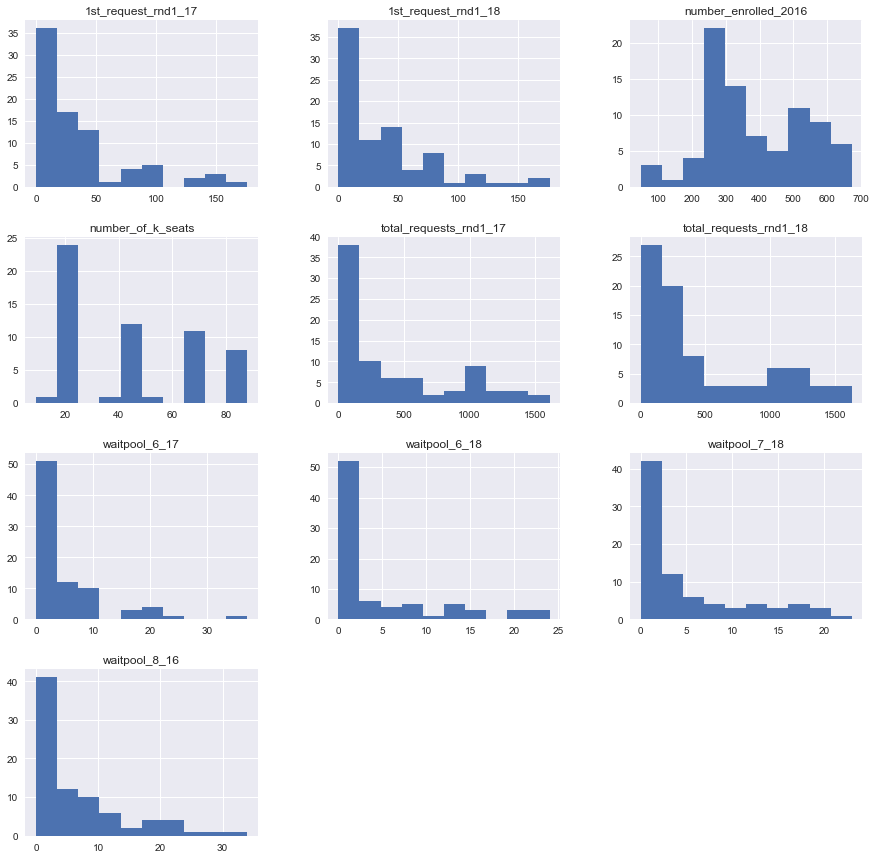

In [46]:
data_simplified.hist(figsize=(15,15));

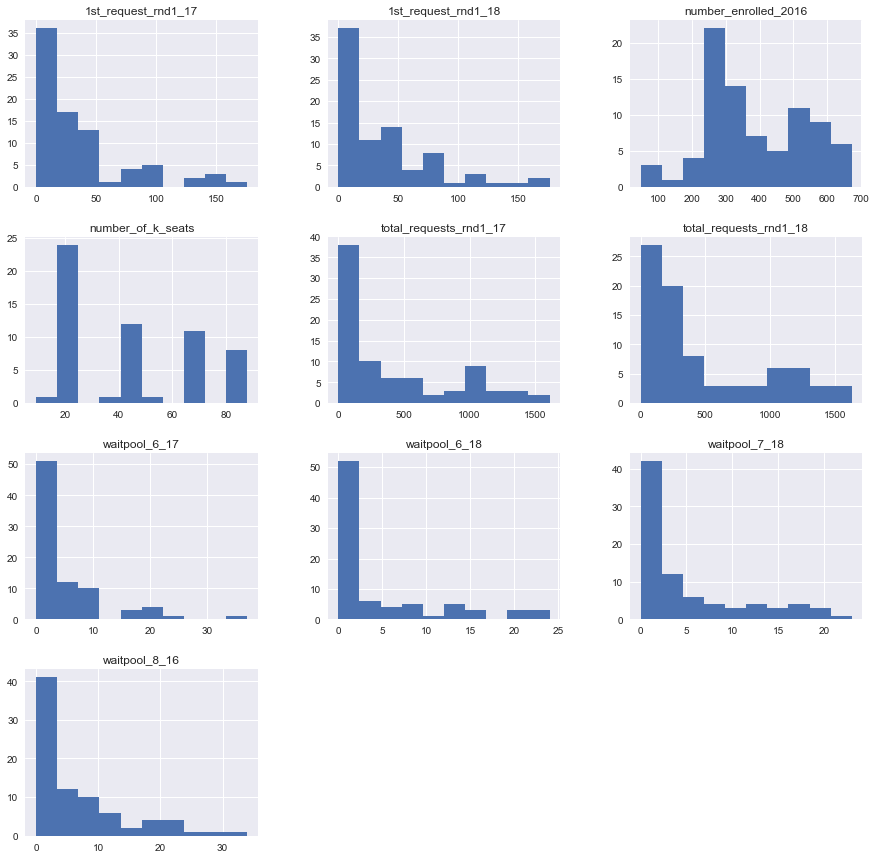

In [47]:
data_simplified.hist(figsize=(15,15));

### Questions:

In [48]:
data_simplified = data_simplified.sort_values(['1st_request_rnd1_18',
'1st_request_rnd1_17',    
'total_requests_rnd1_18',
'total_requests_rnd1_17', 
'waitpool_6_18',             
'waitpool_7_18',
'waitpool_6_17',
'waitpool_8_16'], ascending=False)

#also: loop through https://stackoverflow.com/questions/45927905/loop-though-pandas-dataframe-columns-sort-and-return-the-top-n-results

In [49]:
data_simplified.head()

,school_name,type,grades,number_of_k_seats,number_enrolled_2016,before_after_school_program,1st_request_rnd1_17,1st_request_rnd1_18,total_requests_rnd1_17,total_requests_rnd1_18,waitpool_6_17,waitpool_6_18,waitpool_7_18,waitpool_8_16
46,"Lilienthal, Claire (K-2 Madison Campus), GE",citywide,K-8,66.0,674.0,CLASP (independent nonprofit Claire Lilienthal...,176.0,176.0,1229.0,1282.0,24.0,20.0,18.0,21.0
101,"Sunset Elementary School, GE",attendance,K-5,66.0,377.0,ExCEL After School Program in partnership with...,135.0,169.0,1276.0,1492.0,37.0,24.0,18.0,23.0
44,"Lawton Alternative School (K8), GE",citywide,K-8,66.0,610.0,K.E.E.P - Fee-based AM and PM childcare. Call ...,128.0,155.0,1373.0,1522.0,21.0,22.0,20.0,29.0
30,"Grattan Elementary School, GE",attendance,PreK-5,66.0,359.0,Grattan After School Program (GASP) is a slidi...,147.0,124.0,1457.0,1394.0,20.0,14.0,14.0,34.0
15,Clarendon Elementary School (GE),attendance,K-5,44.0,272.0,Before care starts at 7am and after care until...,144.0,122.0,1610.0,1630.0,19.0,13.0,12.0,21.0


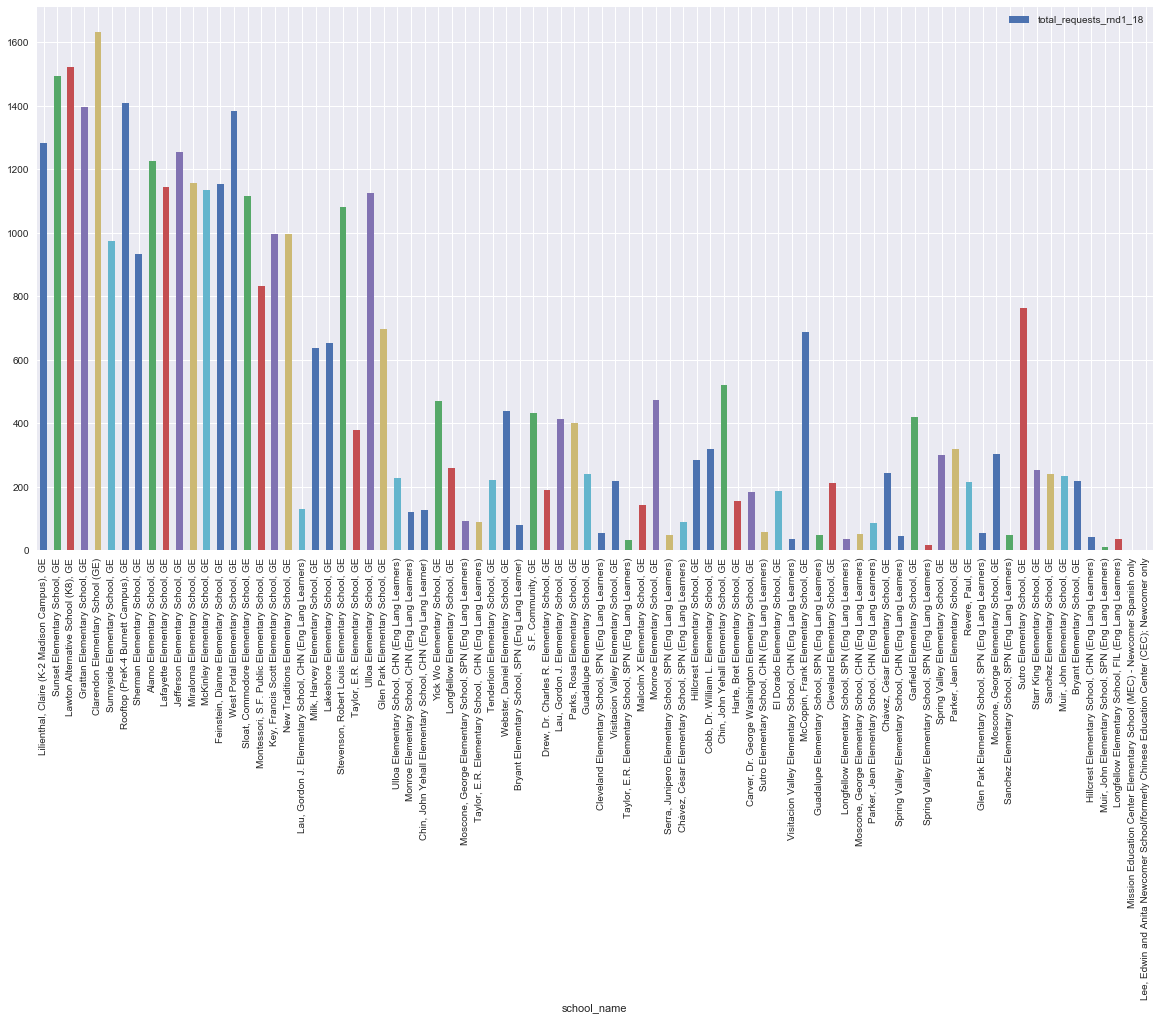

In [50]:
data_simplified.plot(x='school_name', y='total_requests_rnd1_18', kind='bar', figsize=(20,10)) 
plt.show();

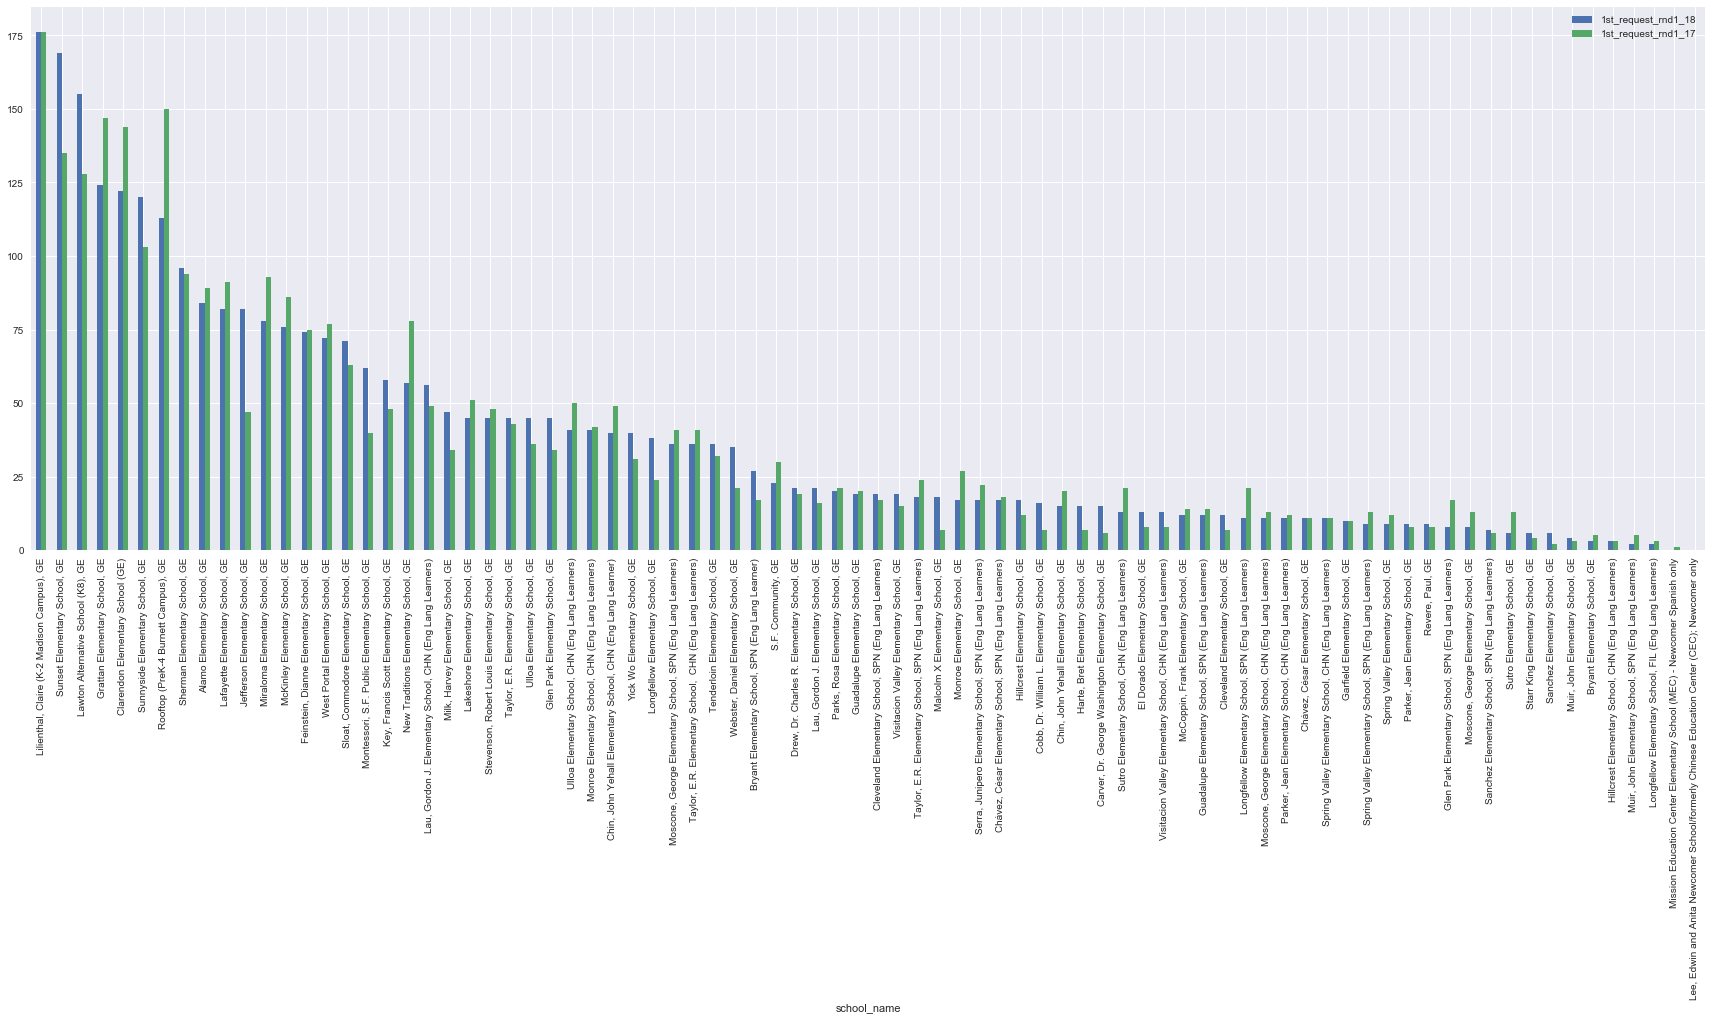

In [51]:
#plot 1st_request_rnd1 columns to see a comparison over time
data_simplified.plot(x='school_name', y=["1st_request_rnd1_18", "1st_request_rnd1_17"], kind="bar", figsize=(30,10));

In [52]:
first_requests_sorted = data_simplified.sort_values(['1st_request_rnd1_18','1st_request_rnd1_17'], ascending=False)

requests_sorted = data_simplified.sort_values(['1st_request_rnd1_18',
'1st_request_rnd1_17',    
'total_requests_rnd1_18',
'total_requests_rnd1_17'], ascending=False)

requests_total_sorted = data_simplified.sort_values(['total_requests_rnd1_18',
'total_requests_rnd1_17'], ascending=False)

waitlist_sorted = data_simplified.sort_values(['waitpool_6_18',             
'waitpool_7_18',
'waitpool_6_17',
'waitpool_8_16'], ascending=False)

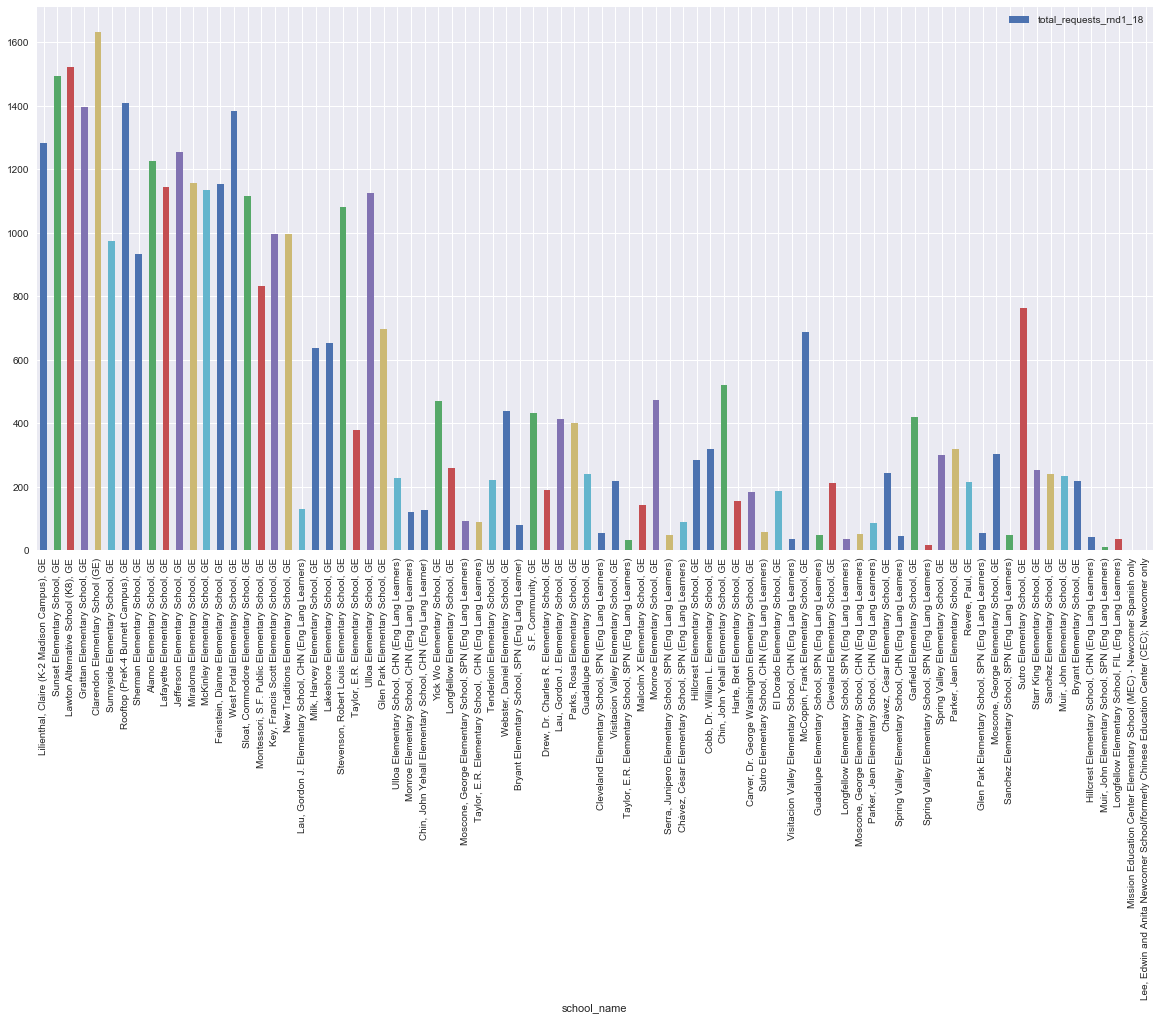

In [53]:
first_requests_sorted.plot(x='school_name', y='total_requests_rnd1_18', kind='bar', figsize=(20,10)) 
plt.show();

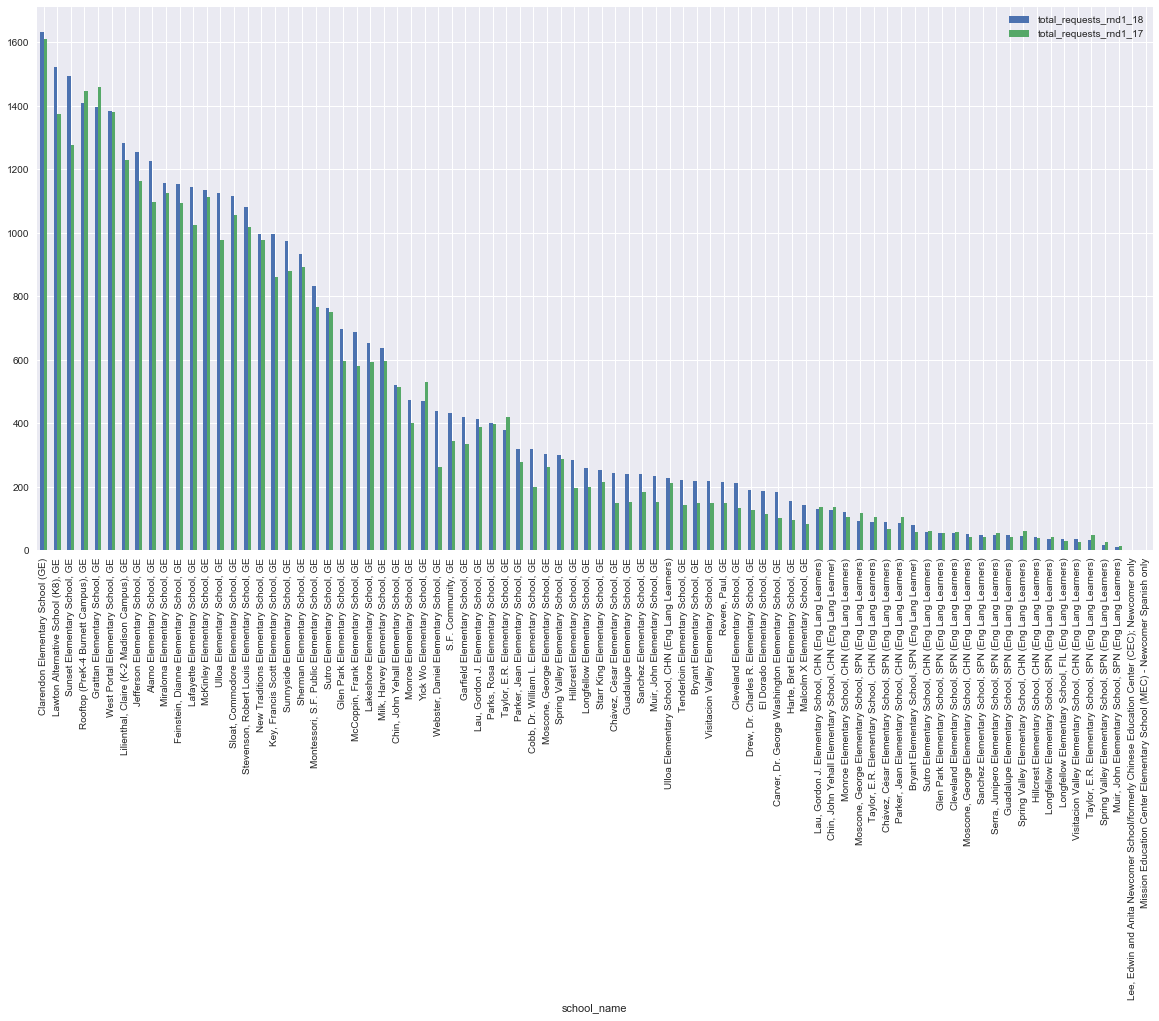

In [54]:
#https://stackoverflow.com/questions/42128467/matplotlib-plot-multiple-columns-of-pandas-data-frame-on-the-bar-chart/42131286
requests_total_sorted.plot(x='school_name', y=["total_requests_rnd1_18", "total_requests_rnd1_17"], kind='bar', figsize=(20,10)) 
plt.show();

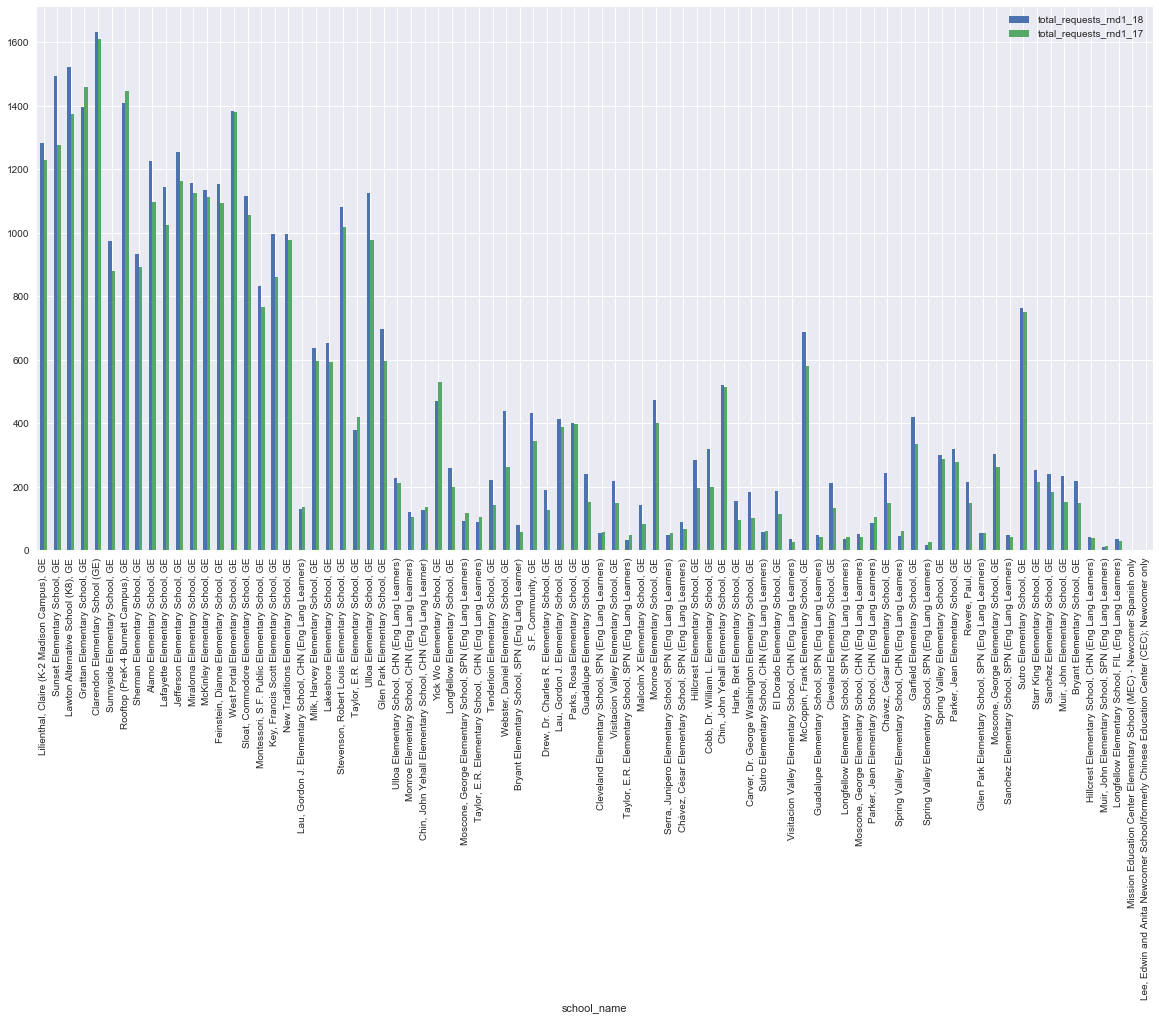

In [55]:
total_requests_by_school = first_requests_sorted.groupby('school_name').head(40)
total_requests_by_school.plot(x='school_name', y=["total_requests_rnd1_18", "total_requests_rnd1_17"], kind='bar', figsize=(20,10)) 
plt.show();

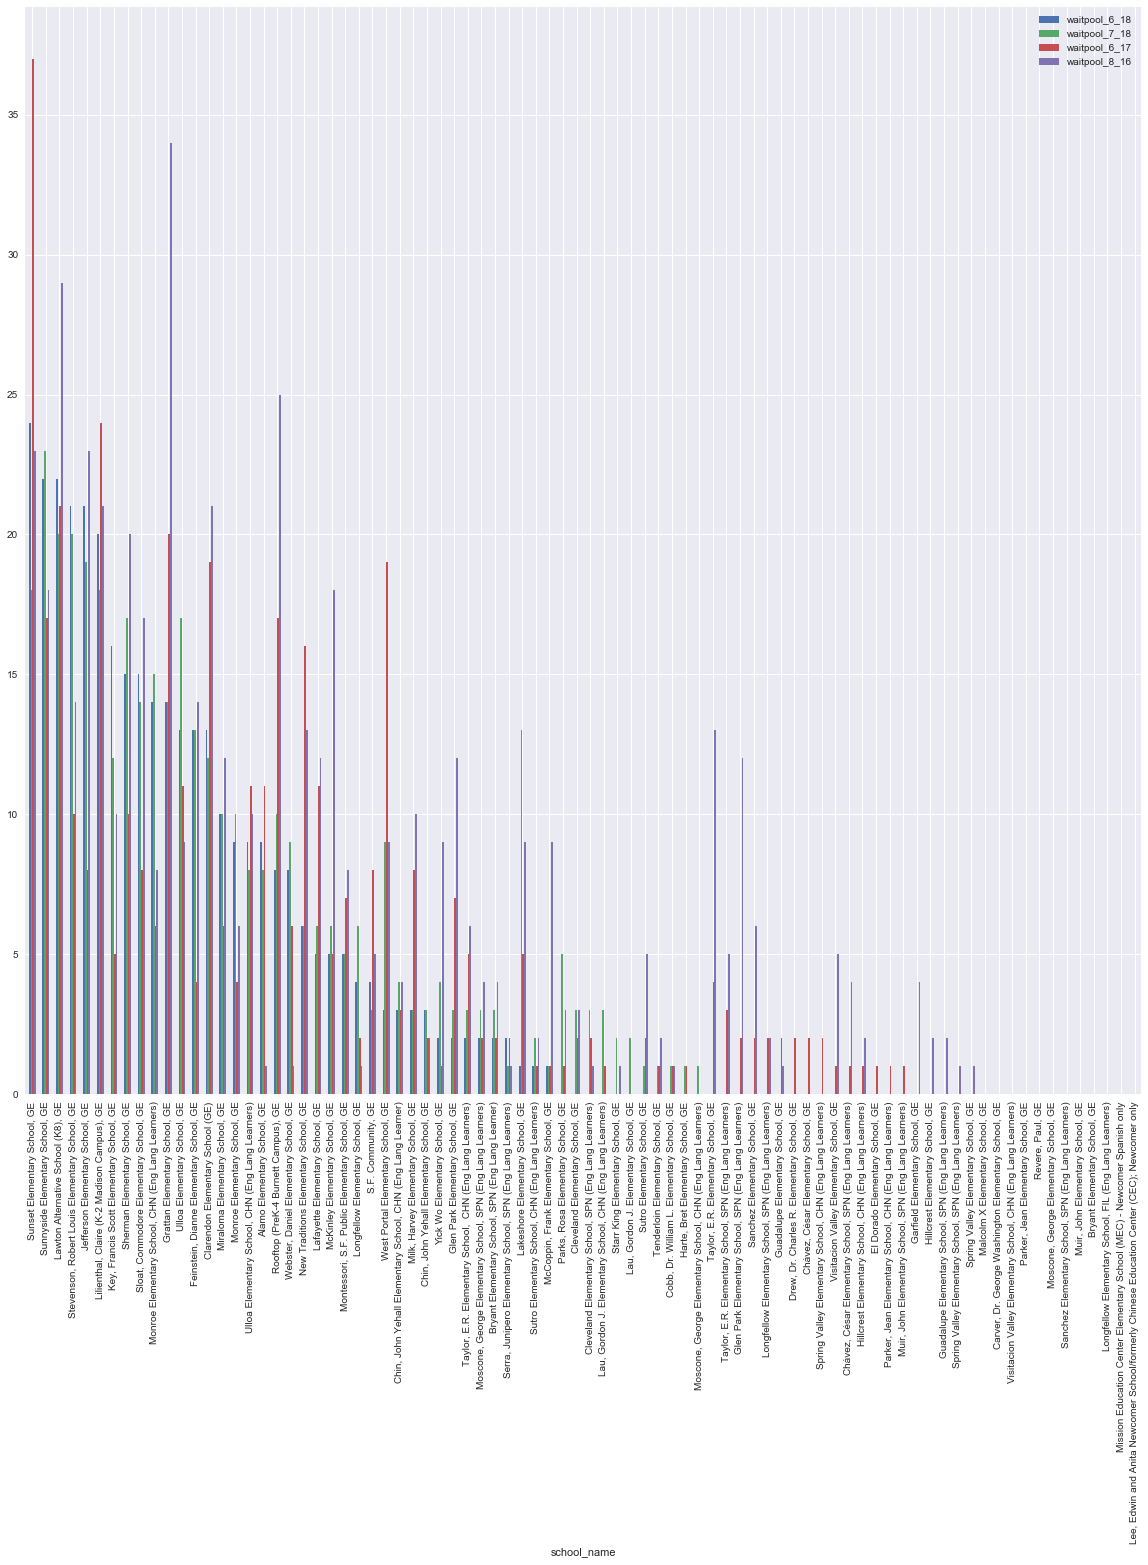

In [56]:
#plot multiple waitlist columns to see a comparison over time
waitlist_sorted.plot(x='school_name', y=['waitpool_6_18',             
'waitpool_7_18',
'waitpool_6_17',
'waitpool_8_16'], kind="bar", figsize=(20,20));

In [57]:
#https://nbviewer.jupyter.org/gist/fomightez/bb5a9c727d93d1508187677b4d74d7c1
waitpool_6_18_by_school = data_simplified.groupby(["school_name"])['waitpool_6_18'].aggregate(np.median).reset_index().sort_values('waitpool_6_18')

/Users/Irene/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


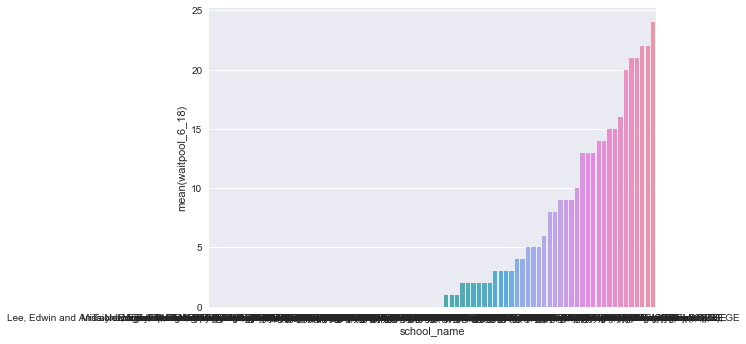

In [58]:
sns.barplot(x='school_name', y="waitpool_6_18", data=data_simplified, order=waitpool_6_18_by_school['school_name']) 
plt.show();

### Export data files

In [59]:
#export to csv
data_simplified.to_csv('data_simplified.csv')
#from pandas import DataFrame
#cdf.to_excel('xcdf.xlsx', sheet_name='sheet1', index=False)

### Wrapping Up

In [ ]:
import pdfkit
pdfkit.from_file('SFUSD_lottery_data_review.html', 'SFUSD_lottery_data_review.pdf')